In [54]:
import pandas as pd
import numpy as np
import jieba.posseg as pseg
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import NMF, LatentDirichletAllocation
import json
import jieba
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
# words cut
# 如果要安装新的模块 使用 anconda prompt 可以安装

In [56]:
seg_list = jieba.cut("我来到北京清华大学", cut_all=True)
print("Full Mode:", "/ ".join(seg_list) ) # 全模式

seg_list = jieba.cut("我来到北京清华大学", cut_all=False)
print ("Default Mode:", "/ ".join(seg_list))  # 精确模式

seg_list = jieba.cut("他来到了网易杭研大厦")  # 默认是精确模式
print (", ".join(seg_list))

seg_list = jieba.cut_for_search("小明硕士毕业于中国科学院计算所，后在日本京都大学深造")  # 搜索引擎模式
print (", ".join(seg_list))

Full Mode: 我/ 来到/ 北京/ 清华/ 清华大学/ 华大/ 大学
Default Mode: 我/ 来到/ 北京/ 清华大学
他, 来到, 了, 网易, 杭研, 大厦
小明, 硕士, 毕业, 于, 中国, 科学, 学院, 科学院, 中国科学院, 计算, 计算所, ，, 后, 在, 日本, 京都, 大学, 日本京都大学, 深造


In [57]:
words = pseg.cut("小明硕士毕业于中国科学院计算所，后在日本京都大学深造")  # 搜索引擎模式
for w in words:
    print (w.word,w.flag)

小明 nr
硕士 n
毕业 n
于 p
中国科学院 nt
计算所 n
， x
后在 t
日本京都大学 nt
深造 v


In [60]:
# stopwords = [ line.rstrip().decode('ANSI').encode('utf-8') for line in open('/Users/liding/E/Bdata/Course/6TextasData/TextasdatachineseStopWords.txt') ]
with open('/Users/liding/E/Bdata/Course/6TextasData/chineseStopWords.txt',encoding="gbk") as f:
    stopwords = f.read().splitlines()
    

In [62]:
report= pd.read_csv('samgov.csv',encoding="gbk")
report.head()

caseids                                            content
0  3618380  尊敬的苏书记您好！赣县王母渡镇新兴村委员会（书记、村长、会计）三个职位在近5年内从未公开竟选...
1  3618382  彭泽县马当镇利山村有一个四十户人家小山村，也可能是整个九江市或是整个江西省还不多不通汽车路的...
2  3618384  书记，您好！真的很抱歉，您日理万机，还要打搅您！我是南昌市安义县的一位普通市民。开学前夕，在...
3  3618390  尊敬的苏书记您好，希望您在百忙之中能关注此事，我们是弱势群体，得了尿毒症，靠血液透析维持生命...
4  3618393  出行难问题，也许在很多人看来不是大事，却是偏僻小乡村的村民最关心，最直接，最现实的利益的问题...

In [63]:
list(pseg.cut('中共中央总书记'))

[pair('中共中央', 'nt'), pair('总书记', 'n')]

In [65]:
txt_list = []
cixing=["x","zg","uj","ul","e","d","uz","y","eng","m"]
for i, txt in enumerate(report['content']):
    result = ''
    try:
        for w in pseg.cut(txt):
                if not str(w.flag)  in cixing:
                    seg=str(w.word)
#                    if seg not in stopwords:
                    result+=str(seg)+" "
        print (i)
    finally:
        pass
    txt_list.append(result)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [66]:
print(txt_list)

['尊敬 苏 书记 您好 赣县 王母 渡镇 新兴村 委员会 书记 村长 会计 职位 在 近 年内 公开 选 人 内定 并 没有 经过 正规 程序 来 进行 近 年内 财务 公开 过 村民 批地 建房 由 村 书记 人 收钱 开 收据 开发票 口头 承诺 要定 可以 办好 收费 标准 并 无 文件 规定 漫口 要价 村民 不知情 但 近 年内 批地 申请表 办 下来 积压 在 镇 国土 资源管理 所 恳请 苏 书记 督促 赣县 检察机关 纪检 部门 到 镇 和 村民 中 调查 因 镇政府 和 镇 国土资源 所 和 村 委员会 干部 有着 千丝万缕 联系 所以 镇 相关 有 过 调查 赣县 王母 渡镇 新兴村 委员会 村长 去年 说 话 我们 光靠 共产党 工资 那里 够 吃饭 不够 所以 搞 点 项目 或 从 国土 审批 中 从 村民 手中 收取 上限 费用 那 吃亏 确实 村委会 工作人员 开价 从未有过 批地 费用 补差 或 退回 难不成 每次 那么 准 好 够 ', '彭泽县 马 当 镇利 山村 有 户 人家 小山村 可能 是 整个 九江市 或是 整个 江西省 不通 汽车 路 村庄 整个 自然村 毛竹 杉树 茶叶 等等 经济林 是 在 半山腰 里 上下 只有 路 到 农忙 时侯 村里 几代人 是 通过 肩挑 手 扛 把 收成 搬 到 山外 通路 地方 这 吃 通路 苦 今年 是 建党 周年 过去 为什么 车路 修不 上去 江西 应该 是 个 交通 大 省 高速公路 省 道 修 宽 有 好 可 对比 这么 条小 山路 我 想 请 九江市 领导 去 走 感受一下 若 要富 修路 这么 条 山路 怎么 能 带领 百姓 过 上 小康生活 市 领导 百姓 恳请 共产党 为 我们 修 辛福 之 路 小康 之路 行 我 在 想 出行 难 问题 在 领导 看来 不是 大事 偏僻 乡村 村民 关心 直接 现实 利益 问题 因此 这 不仅 是 村民 与 外界 连通 公路 修往 群众 民心 路 抓住 一件件 重要 迫切 小事 构筑 起 牢固 民心工程 时 今日 今时 保持 同 人民 群众 血肉 联系 关建 所在 全体 村民 期待 行路难 问题 在 新一届 领导班子 能 得到 解决 ', '书记 您好 抱歉 日理万机 还要 打搅 我 是 南昌市 安义县 普通 市民 开学 前夕 在 外地

In [67]:
vectorizer = CountVectorizer(min_df=1)
dtm = vectorizer.fit_transform(txt_list)
vocab = vectorizer.get_feature_names()

In [68]:
lda = LatentDirichletAllocation(n_topics=20, max_iter=5,)
l = lda.fit(dtm)
data = pd.DataFrame(l.components_)
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()
print_top_words(l, vocab, 10)

/Users/liding/anaconda/anaconda/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:508: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


Topic #0:
隧道 乙方 修建 区内 城际 身份 承诺 开工 协议 小区
Topic #1:
上交 房价 刚性 套房 差价 房子 年内 出售者 投机 升值
Topic #2:
教师 我们 工程 学校 江西 学生 老师 一大 什么 教育
Topic #3:
良田 村委会 计生委 司机 造成 法院 计划生育 太和 计生办 小车
Topic #4:
赌博 一中 分宜 落实到户 带头 聚众赌博 有偿 初一 金溪 初二
Topic #5:
我们 领导 没有 职工 书记 反映 解决 公司 小区 工资
Topic #6:
石城 暑假 补课 电站 采石场 人士 风景 义务教育 调入 学费
Topic #7:
账目 补偿款 婆婆 辍学 枣园 虚假 公公 人工 餐饮 分文
Topic #8:
民国时期 马上会 修去 入口 跟加 上电 奉公 俗话说得好 网站 袁州区
Topic #9:
进行 查检 垃圾 举报电话 市政管理 监督 合格 卫生 举报 力度
Topic #10:
开发商 社区 中兴 豪苑 居民 办公用房 派出所 烧烤 提供 农补
Topic #11:
南昌 交通 科技 世界 堵车 我市 拥堵 捐献 公交车 立交
Topic #12:
广告 折迁 环境 张贴 群众 意见 政策 方案 激发 楼道
Topic #13:
订阅 报纸 想不 发挥 构筑 修往 今时 今日 一件件 连通
Topic #14:
石岗 河头 淹死 镇上 新建县 太深 采沙 和鹅 流失 要装
Topic #15:
利培 精神分裂症 患者 天津 药业 研究院 有限责任 药物 牌利 培酮片
Topic #16:
改革 公司 进行 查检 同时 利润 为了 电话 全县 所有
Topic #17:
处理 邮件 邮政局 南昌市 中心 低下 到达 挂号信 用户 目前为止
Topic #18:
我们 没有 省长 政府 书记 村民 问题 反映 现在 领导
Topic #19:
中学 小学生 安义 营养 餐费 免除 就读 批地 初中 委员会



In [69]:
num_topics = 20
num_top_words = 20

In [70]:
clf = NMF(n_components=num_topics, random_state=1)
doctopic = clf.fit_transform(dtm)
topic_words = []
for topic in clf.components_:
    word_idx = np.argsort(topic)[::-1][0:num_top_words]
    topic_words.append([vocab[i] for i in word_idx])
words = pd.DataFrame(topic_words)
words.to_csv('topicterm.csv', encoding='gb18030')
doctopic = doctopic / np.sum(doctopic, axis=1, keepdims=True)
doctopic = pd.DataFrame(doctopic)
report = pd.concat([report, doctopic], axis=1)
report.to_csv('topics.csv')

In [71]:
N, K = doctopic.shape
ind = np.arange(N) 
width = 0.5

(array([ 601.,   76.,   17.,    2.,    0.,    0.,    0.,    0.,    0.,    1.]),
 array([ 0.        ,  0.09902222,  0.19804445,  0.29706667,  0.39608889,
         0.49511112,  0.59413334,  0.69315556,  0.79217779,  0.89120001,
         0.99022223]),
 <a list of 10 Patch objects>)

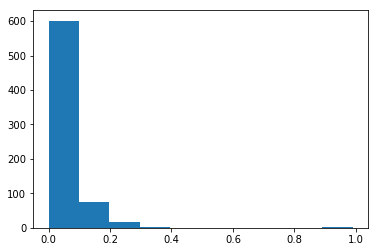

In [72]:
plt.hist(doctopic[11])

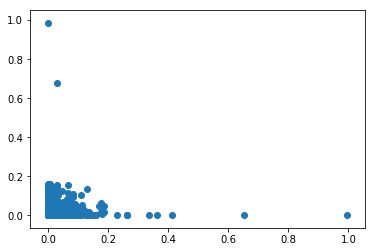

In [73]:
plt.scatter(doctopic[4], doctopic[7])

In [74]:
np.mean(doctopic)

0     0.127575
1     0.034083
2     0.011080
3     0.146310
4     0.023298
5     0.020922
6     0.012086
7     0.024386
8     0.034431
9     0.049531
10    0.058071
11    0.038577
12    0.017040
13    0.027496
14    0.068969
15    0.043070
16    0.010006
17    0.108906
18    0.064853
19    0.079309
dtype: float64

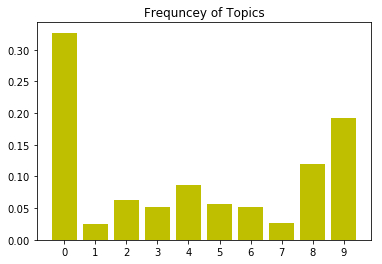

In [79]:
topic = ('0', '1', '2', '3', '4','5', '6', '7', '8', '9')
y_pos = np.arange(len(topic))
percent = (0.327, 0.025, 0.063, 0.052, 0.086,0.056, 0.052, 0.027, 0.119, 0.192)
error = np.random.rand(len(topic))

plt.bar(y_pos, percent, align='center', color='Y')
plt.xticks(y_pos, topic)
plt.title('Frequncey of Topics')

plt.show()

{'boxes': [<matplotlib.lines.Line2D at 0x120e4c128>],
 'caps': [<matplotlib.lines.Line2D at 0x120e54b00>,
 'fliers': [<matplotlib.lines.Line2D at 0x120e5cd30>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x120e5c518>],
 'whiskers': [<matplotlib.lines.Line2D at 0x120e4ca90>,
  <matplotlib.lines.Line2D at 0x120e4cc88>]}

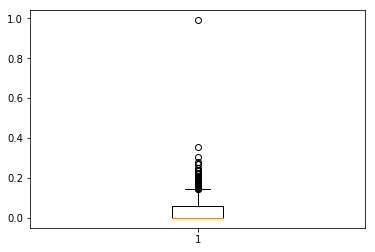

In [80]:
plt.boxplot(doctopic[11])